# Proyek Analisis Data: Bike Sharing
- Nama: Moh. Aflah Azzaky
- Email: aflahazzaki123@gmail.com
- Id Dicoding: aflahazzaky

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja dan akhir pekan?
- Apakah cuaca memiliki pengaruh signifikan terhadap penggunaan sepeda?
- Bagaimana distribusi waktu penggunaan sepeda berdasarkan jam dalam sehari?

## Menyiapkan semua library yang dibuthkan

Library untuk kebutuhan pengolahan data
*   **Numpy**, digunakan untuk komputasi data numerik.
*   **Pandas**, digunakan untuk manipulasi dan analisis data.

Library untuk kebutuhan visualisasi data
*   **Matplotlib**, digunakan untuk membuat sebuah figure.
*   **Seaborn**, digunakan untuk membuat visualisasi yang atraktif dan informatif.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca dataset berformat csv dari Github Repository menggunakan library Pandas

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/aflah201/AnalisisDataPython-Dicoding/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/aflah201/AnalisisDataPython-Dicoding/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Mengecek tipe data yang digunakan pada dataset**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menurut pengamatan yang saya lakukan, terdapat kesalahan tipe data pada ***dteday*** yang harusnya menggunakan tipe data ***datetime***.

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menurut pengamatan yang saya lakukan, terdapat kesalahan tipe data pada ***dteday*** yang harusnya menggunakan tipe data ***datetime***.

**Mengecek dataset apakah terdapat missing value**

In [40]:
print("Day Dataframe Missing Value",day_df.isna().sum())
print("\nHour Dataframe Missing Value",hour_df.isna().sum())

Day Dataframe Missing Value instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hour Dataframe Missing Value instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Menurut pengecekan data diatas, tidak terdapat missing value.

**Mengecek dataset apakah terdapat duplikasi**

In [6]:
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


Menurut pengecekan data diatas, tidak terdapat data yang duplikat/ganda.

**Mengecek parameter statistik pada dataset**

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil ***day_df dan hour_df*** yang ditampilkan, tidak ditemukan parameter yang tidak sesuai.

### Cleaning Data

Memperbaiki tipe data pada **day_df & hour_df** pada kolom ***dteday***

In [9]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [10]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Mengecek kembali apakah sudah berubah untuk tipe datanya

In [28]:
print('day_df["dteday"] : ', day_df["dteday"].dtypes)
print('hour_df["dteday"] : ', hour_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]
hour_df["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore day_df

In [13]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
635,636,2012-09-27,4,1,9,0,4,1,2,0.650000,0.607975,0.690833,0.134342,751,6642,7393
112,113,2011-04-23,2,0,4,0,6,0,2,0.460000,0.450121,0.887917,0.230725,1462,2574,4036
106,107,2011-04-17,2,0,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,1558,2186,3744
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
600,601,2012-08-23,3,1,8,0,4,1,1,0.695833,0.637008,0.635833,0.084596,1363,6402,7765


**Normalisasi data pada**

* Temperature (nilainya dibagi menjadi 41)
* Feeling temperature (nilainya dibagi menjadi 50)
* Humidity (nilainya dibagi menjadi 100)
* Windspeed (nilainya dibagi menjadi 67)

maka dalam pengggunaan kode kita ubah menjadi perkalian untuk mengembalikan nilai asli

In [14]:
day_df["temp"] = day_df["temp"].multiply(41)
day_df["atemp"] = day_df["atemp"].multiply(50)
day_df["hum"] = day_df["hum"].multiply(100)
day_df["windspeed"] = day_df["windspeed"].multiply(67)
day_df.describe(include="all")

<ipython-input-14-87df165700db>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


Menampilkan jumlah musim pada dataset, dengan mengubah kode menjadi nama musim

In [33]:
day_df.loc[day_df["season"] == 1, "season"] = "Springer"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"
day_df.season.value_counts()

Fall        188
Summer      184
Springer    181
Winter      178
Name: season, dtype: int64

Menampilkan jumlah tahun pada dataset, dengan mengubah kode menjadi tahun

In [16]:
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"
day_df.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

Menampilkan jumlah bulan pada dataset

In [17]:
day_df.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

Menampilkan jumlah libur dan tidak libur

In [18]:
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a Holiday"
day_df.holiday.value_counts()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

Menampilkan jumlah hari, dengan mengubah kode menjadi nama hari

In [19]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"
day_df.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Wed    104
Thu    104
Fri    104
Name: weekday, dtype: int64

Menampilkan jumlah hari kerja, dengan mengubah kode menjadi Holiday / Working Day

In [20]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"
day_df.workingday.value_counts()

Working Day    500
Holiday        231
Name: workingday, dtype: int64

Menampilkan jumlah cuaca, dengan mengubah kode menjadi jenis cuaca

In [21]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy"
day_df.weathersit.value_counts()

Clear     463
Cloudy    247
Light      21
Name: weathersit, dtype: int64

### Explore hour_df

Menampilkan jumlah jam pada dataset hour

In [23]:
hour_df.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

Menampilkan jumlah cuaca dari dataset hour, dengan mengubah kode menjadi jenis cuaca

In [24]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Cloudy"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "Light"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Heavy"
hour_df.weathersit.value_counts()

Clear     11413
Cloudy     4544
Light      1419
Heavy         3
Name: weathersit, dtype: int64

## Visualization & Explanatory Analysis

### Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja dan akhir pekan?

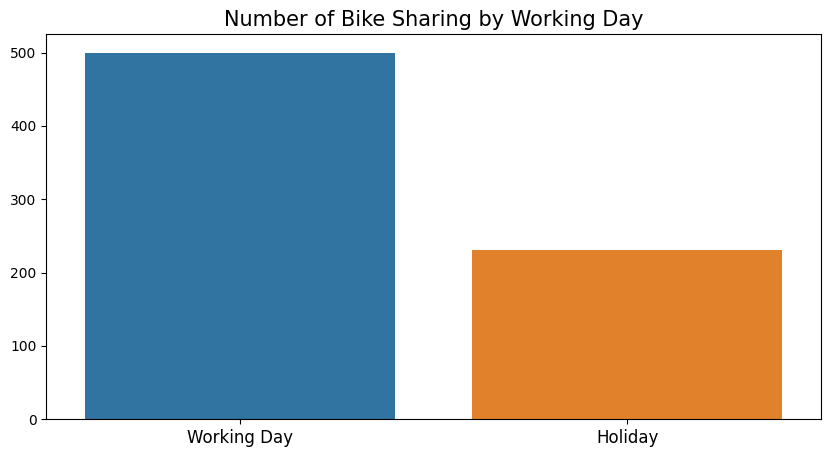

In [68]:
groupby_workingday = day_df.groupby(by="workingday").instant.nunique().reset_index()
groupby_workingday.rename(columns={
    "instant" : "count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="workingday",
    data=groupby_workingday.sort_values(by="count", ascending=False)
)
plt.title("Number of Bike Sharing by Working Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Apakah cuaca memiliki pengaruh signifikan terhadap penggunaan sepeda?

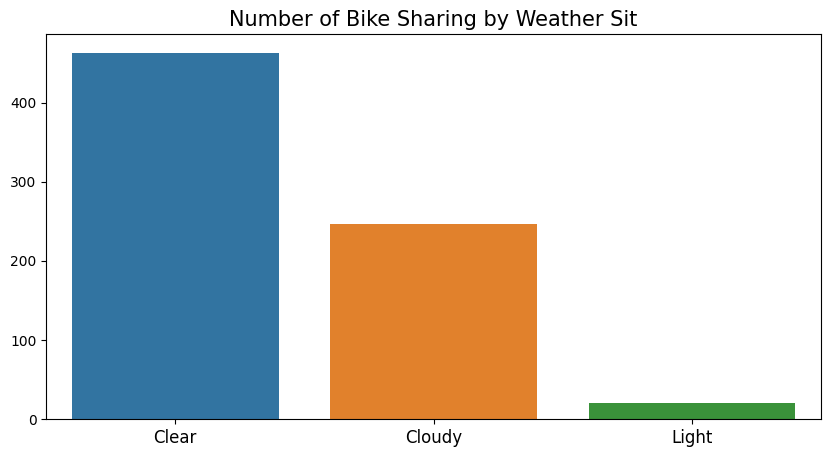

In [69]:
groupby_weathersit = day_df.groupby(by="weathersit").instant.nunique().reset_index()
groupby_weathersit.rename(columns={
    "instant" : "count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="weathersit",
    data=groupby_weathersit.sort_values(by="count", ascending=False)
)
plt.title("Number of Bike Sharing by Weather Sit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Bagaimana distribusi waktu penggunaan sepeda berdasarkan jam dalam sehari?

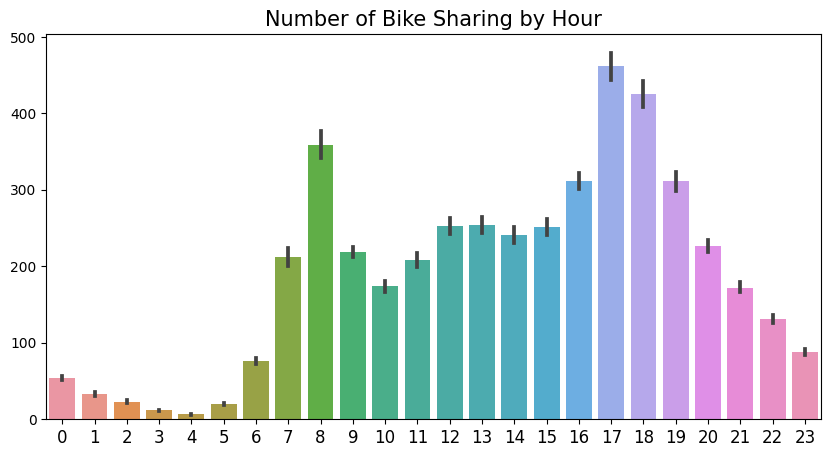

In [70]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour_df.sort_values(by="hr", ascending=False)
)
plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

1. Dari hasil analisis tabel `groupby_workingday`, terlihat bahwa jumlah pengguna bike sharing lebih tinggi pada `hari kerja` dibandingkan dengan hari-hari lainnya. Dengan demikian, dapat disimpulkan bahwa faktor `hari kerja` memiliki pengaruh signifikan terhadap tingkat penggunaan layanan bike sharing.

2. Hasil pengamatan dari tabel `groupby_weathersit` menunjukkan bahwa penggunaan layanan bike sharing lebih tinggi saat cuaca dalam kondisi `cerah`. Oleh karena itu, dapat disimpulkan bahwa kondisi cuaca cerah memiliki pengaruh positif terhadap jumlah pengguna bike sharing, yang dapat mengindikasikan bahwa orang lebih cenderung menggunakan layanan ini saat cuaca cerah.

3. Analisis tabel `hour_df` menunjukkan bahwa tren penggunaan bike sharing mencapai puncaknya pada pukul 17. Dari data ini, dapat disimpulkan bahwa pukul 17 adalah waktu yang paling banyak dipilih oleh pengguna untuk menggunakan layanan bike sharing, menandakan bahwa pukul 17 adalah jam paling ramai dalam penggunaan sepeda berbagi.

## Export Dataset

In [71]:
day_df.to_csv("day_clear.csv", index=False)